In [47]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from scipy.stats import iqr
%matplotlib inline
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cd "/content/gdrive/MyDrive/AIML/projects/SupervisedLearning"

/content/gdrive/MyDrive/AIML/projects/SupervisedLearning


In [7]:
ls

 Data1.csv   Normal.csv                 'Supervised Learning - Milestones.pdf'   Type_S.csv
 Data2.csv  'SL_Problem Statement.pdf'   Type_H.csv


**Part 1. 1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables.**

In [8]:
s= pd.read_csv('Type_S.csv')
h= pd.read_csv('Type_H.csv')
normal= pd.read_csv('Normal.csv')
normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


**Part 1.1 b - Print Shape and columns of all the 3 DataFrames**

In [9]:
h.shape
s.shape
normal.shape
h.info()
s.info()
normal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-nu

**Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations**
**Observation: All columns of the 3 DataFrames havve same features**

In [10]:
normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


**Part 1.1 d - Print DataTypes of all the 3 DataFrames.**

In [11]:
h.info()
s.info()
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-nu

**Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames**
**Observation: the different types of class values for**
**Norma:['Normal', 'Nrmal'],['Type_S', 'tp_s'],['Type_H', 'type_h']**

In [12]:
h.Class.unique()
s.Class.unique()
normal.Class.unique()

array(['Normal', 'Nrmal'], dtype=object)

**Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames**

In [13]:
#normal[normal.Class=='Nrmal']
#normal[normal.Class=='Normal']
s.loc[s.Class=='tp_s','Class']='Type_S'
s=s
h.loc[h.Class=='type_h','Class']='Type_H'
h=h
normal.loc[normal.Class=='Nrmal','Class']='Normal'
normal=normal



**Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame**

In [14]:
frames=[s,h,normal]
data =pd.concat(frames)
data.Class.unique()
data.shape

(310, 7)

**Part 1.2 c - Print 5 random samples of this DataFrame**

In [15]:
data.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
15,59.726140,7.724873,55.343485,52.001268,125.174221,3.235159,Normal
89,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,Type_S
58,57.145851,16.489091,42.842148,40.656760,113.806178,5.015186,Normal
31,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331,Normal
73,81.754419,20.123466,70.560440,61.630954,119.425086,55.506889,Type_S


**Part 1.2 d - Print Feature-wise percentage of Null values**

In [16]:
data.P_incidence.isnull().sum()
data.P_tilt.isnull().sum()
data.L_angle.isnull().sum()
data.S_slope.isnull().sum()
data.P_radius.isnull().sum()
data.S_Degree.isnull().sum()
data.Class.isnull().sum()

0

**Part 1.2 e - Check 5-point summary of the new DataFrame**

In [17]:
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [18]:
data_icol=data.iloc[:,:6]

**Part 1.3 a - Visualize a heatmap to understand correlation between all features**



In [19]:
data_cor=data_icol.corr()

<Axes: >

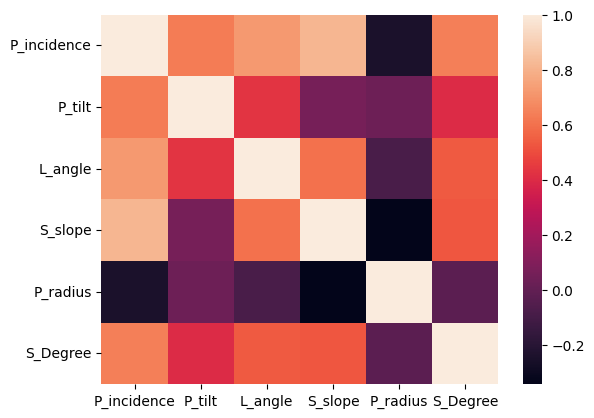

In [20]:
sns.heatmap(data_cor)

In [21]:
data_cor

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


Features having Strong Coorelation: P_incidence,P_tilt: 0.62
P_incidence,L_angle: 0.71
P_incidence,S_slope:0.81
P_incidence,S_Degree:0.63
P_tilt,L_angle:0.43
L_angle,S_slope:0.59
L_angle,S_Degree:0.53
S_Slope,S_Degree:0.52
Features having weaker correclation:P_incidence,P_radius:-0.24
P_tilt,P_radius=0.03;P_tilt,S_slope:0.06
L_angle,P_radius=-0.08
P_radius,S_Degree=-0.02



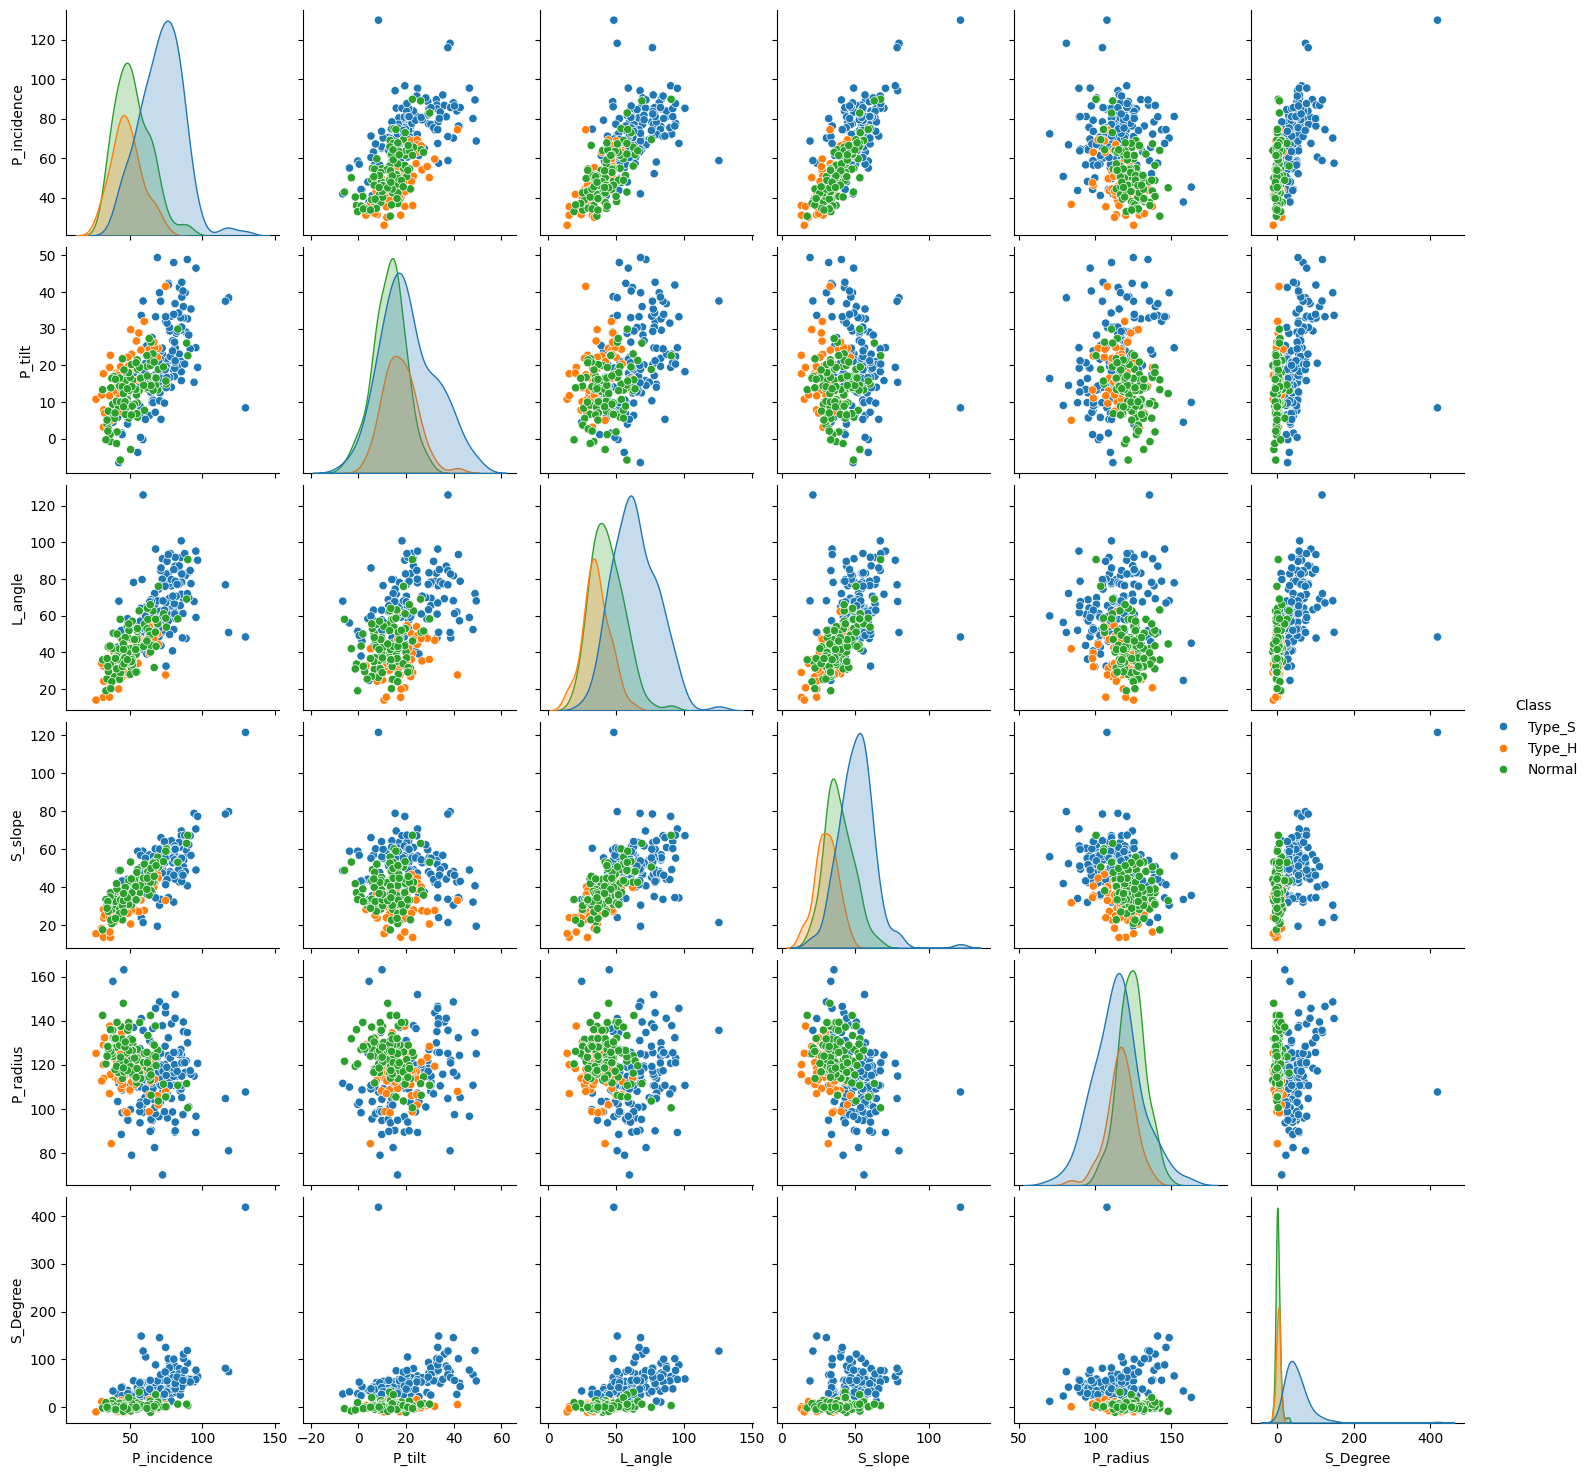

In [22]:
sns.pairplot(data,diag_kind='kde',hue='Class')

**Insights from Pairplot:**
P_incidence has linear dependency with P_tilt and L_angle for Normal and Type_H classes.For Type_S the linear dependency is there with L_angle but for P_tilt and S_slope it looks curved.


**Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights**

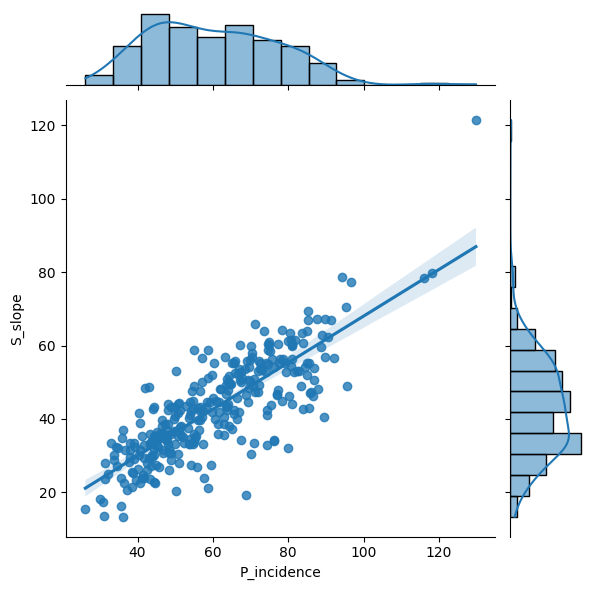

In [23]:
sns.jointplot(data=data_icol,x='P_incidence',y='S_slope',kind='reg')

**Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.**

<Axes: xlabel='P_incidence', ylabel='Class'>

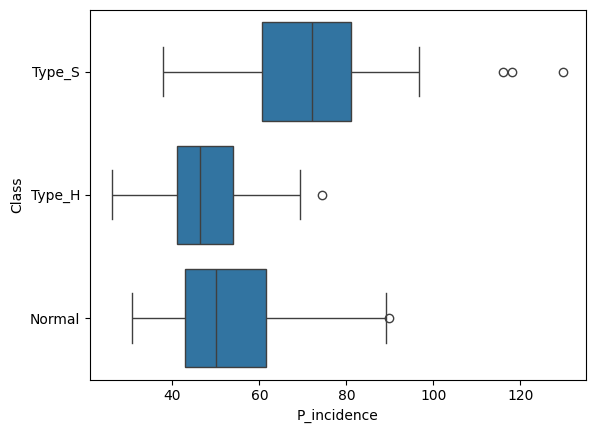

In [24]:
sns.boxplot(data=data,x='P_incidence',y='Class')

In [25]:
def getUpfence(cls:str,attr:str):
  p25=np.quantile(data[data['Class']==cls][attr],0.25)
  p75=np.quantile(data[data['Class']==cls][attr],0.75)
  IQR =p75-p25
  UpFence =p75+1.5*IQR
  UpFence
  return UpFence


**Outliers detection**

In [26]:
outliers_pincidence=data.loc[((data['Class']=='Normal') &  (data['P_incidence'] >=getUpfence('Normal','P_incidence')))
| ((data['Class']=='Type_S') &  (data['P_incidence'] >=getUpfence('Type_S','P_incidence')))
| ((data['Class']=='Type_H') &  (data['P_incidence'] >=getUpfence('Type_H','P_incidence')))]
outliers_pincidence

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Type_S
102,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,Type_S
103,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Type_S
51,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,Type_H
14,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,Normal


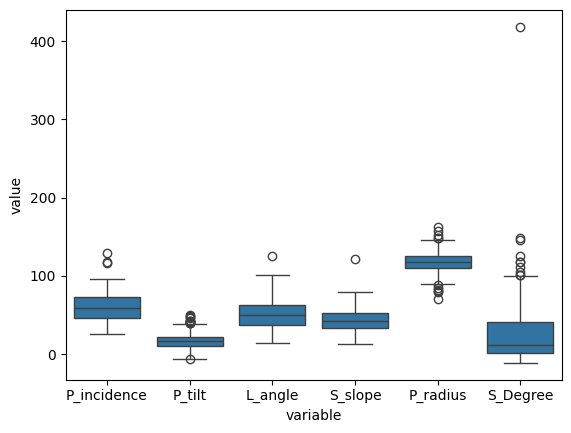

In [27]:
sns.boxplot(data=pd.melt(data_icol),x='variable',y='value')
plt.show()

<Axes: xlabel='P_tilt', ylabel='Class'>

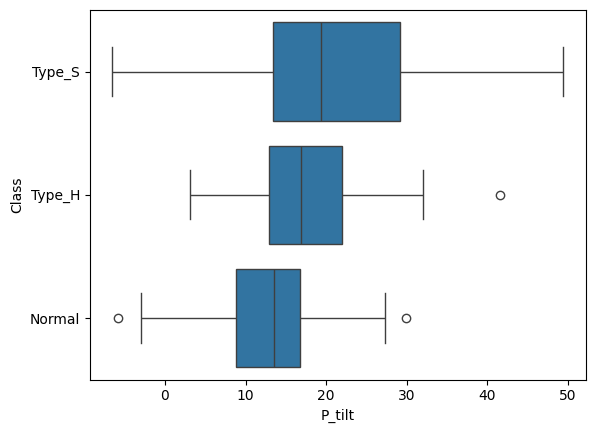

In [28]:
sns.boxplot(data=data,x='P_tilt',y='Class')

In [29]:
attr='P_tilt'
outliers_ptilt=data.loc[((data['Class']=='Normal') &  (data[attr] >=getUpfence('Normal',attr)))
| ((data['Class']=='Type_S') &  (data[attr] >=getUpfence('Type_S',attr)))
| ((data['Class']=='Type_H') &  (data[attr] >=getUpfence('Type_H',attr)))]
outliers_ptilt

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
51,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,Type_H
89,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338,Normal


<Axes: xlabel='L_angle', ylabel='Class'>

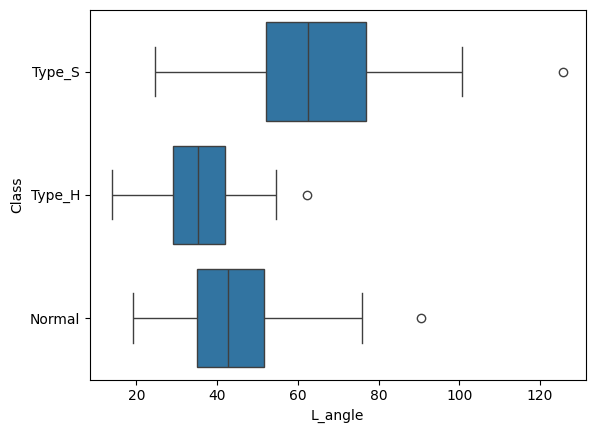

In [30]:
sns.boxplot(data=data,x='L_angle',y='Class')

In [31]:
attr='L_angle'
outliers_langle=data.loc[((data['Class']=='Normal') &  (data[attr] >=getUpfence('Normal',attr)))
| ((data['Class']=='Type_S') &  (data[attr] >=getUpfence('Type_S',attr)))
| ((data['Class']=='Type_H') &  (data[attr] >=getUpfence('Type_H',attr)))]
outliers_langle

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
137,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Type_S
44,56.030218,16.297915,62.275275,39.732303,114.023117,-2.325684,Type_H
14,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,Normal


<Axes: xlabel='S_slope', ylabel='Class'>

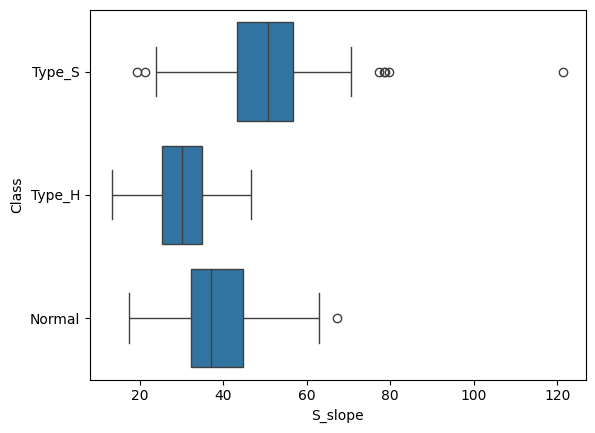

In [32]:
sns.boxplot(data=data,x='S_slope',y='Class')

In [33]:
attr='S_slope'
outliers_sslope=data.loc[((data['Class']=='Normal') &  (data[attr] >=getUpfence('Normal',attr)))
| ((data['Class']=='Type_S') &  (data[attr] >=getUpfence('Type_S',attr)))
| ((data['Class']=='Type_H') &  (data[attr] >=getUpfence('Type_H',attr)))]
outliers_sslope



,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
34,94.174822,15.380770,67.705721,78.794052,114.890113,53.255220,Type_S
36,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,Type_S
55,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Type_S
102,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,Type_S
103,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Type_S
14,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,Normal


<Axes: xlabel='P_radius', ylabel='Class'>

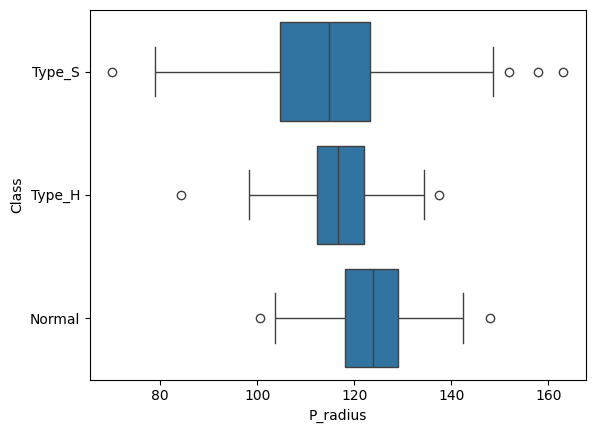

In [34]:
sns.boxplot(data=data,x='P_radius',y='Class')

In [35]:
attr='P_radius'
outliers_pradius=data.loc[((data['Class']=='Normal') &  (data[attr] >=getUpfence('Normal',attr)))
| ((data['Class']=='Type_S') &  (data[attr] >=getUpfence('Type_S',attr)))
| ((data['Class']=='Type_H') &  (data[attr] >=getUpfence('Type_H',attr)))]
outliers_pradius

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
23,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,Type_S
25,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Type_S
120,37.903910,4.479099,24.710274,33.424811,157.848799,33.607027,Type_S
37,35.703458,19.443253,20.700000,16.260205,137.540613,-0.263490,Type_H
94,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal


<Axes: xlabel='S_Degree', ylabel='Class'>

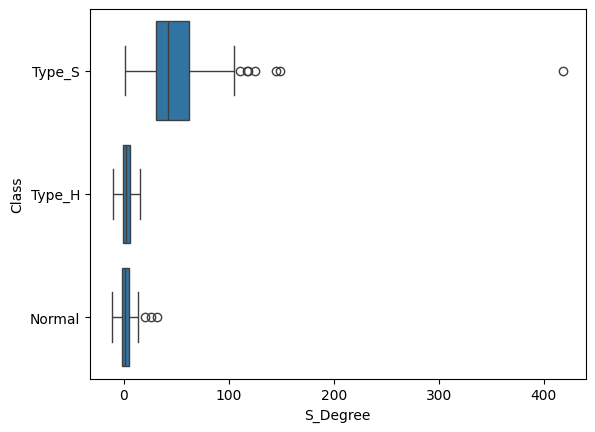

In [36]:
sns.boxplot(data=data,x='S_Degree',y='Class')

In [37]:
attr='S_Degree'
outliers_sdegree=data.loc[((data['Class']=='Normal') &  (data[attr] >=getUpfence('Normal',attr)))
| ((data['Class']=='Type_S') &  (data[attr] >=getUpfence('Type_S',attr)))
| ((data['Class']=='Type_H') &  (data[attr] >=getUpfence('Type_H',attr)))]
outliers_sdegree


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
15,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,Type_S
16,86.753609,36.043016,69.221045,50.710593,139.414504,110.860782,Type_S
35,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,Type_S
55,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Type_S
81,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,Type_S
132,74.469082,33.283157,66.942101,41.185925,146.466001,124.984406,Type_S
137,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Type_S
12,56.103774,13.106307,62.637020,42.997467,116.228503,31.172767,Normal
45,67.538182,14.655042,58.001429,52.883139,123.632260,25.970206,Normal
83,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759,Normal


In [38]:
outlrs=[outliers_sdegree,outliers_pradius,outliers_sslope,outliers_langle,outliers_ptilt,outliers_pincidence]
combined=pd.concat(outlrs)
combined=combined[combined.duplicated()==True]
combined.index.unique()
#select_indices = np.unique(list(np.where(combined)))
#data.iloc[select_indices]
data.drop(combined.index.unique(),inplace=True)

**Part 1.4 a - Split data into X and Y.**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
X = data.iloc[:,:6]  # Predictor feature columns (8 X m)

Y = data['Class']  # Predicted class (1=True, 0=False) (1 X m)
from sklearn.neighbors import RadiusNeighborsClassifier


**Part 1.4 b - Split data into train and test with 80:20 proportion**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# 1 is just any random seed number

X_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
38,55.843286,28.847448,47.690543,26.995838,123.311845,2.812427
112,56.668293,13.458203,43.769710,43.210089,93.692209,21.108121
17,61.540599,19.676957,52.892229,41.863642,118.686268,4.815031
41,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476
40,84.585607,30.361685,65.479486,54.223922,108.010218,25.118478


**Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier**

In [41]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

**Part 1.4 d - Print all the possible performance metrics for both train and test data**

In [49]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)


0.7833333333333333

Confusion Matrix


<Axes: >

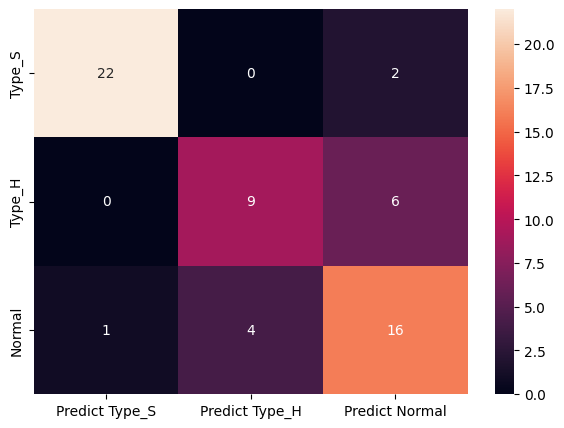

In [50]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Type_S", "Type_H","Normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Type_S", "Type_H","Normal"]],
                  columns = [i for i in ["Predict Type_S","Predict Type_H","Predict Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

**Part 1.5 a - Experiment with various parameters to improve performance of the base model**

In [51]:
def kNN(n_neighbors:int,weights:str):
   NNH = KNeighborsClassifier(n_neighbors , weights = 'distance' )
   # Call Nearest Neighbour algorithm
   NNH.fit(X_train, y_train)
   predicted_labels = NNH.predict(X_test)
   score=NNH.score(X_test, y_test)
   return score



In [52]:
scores=[]
neighbours=[]
for i in range(2,18):
  scores.append(kNN(i,'distance'))
  neighbours.append("neighbours"+str(i))

print(scores)
print(neighbours)



[0.75, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.8, 0.8333333333333334, 0.8, 0.7666666666666667, 0.7833333333333333, 0.7666666666666667, 0.8, 0.7333333333333333, 0.7666666666666667, 0.7666666666666667, 0.7833333333333333, 0.75]
['neighbours2', 'neighbours3', 'neighbours4', 'neighbours5', 'neighbours6', 'neighbours7', 'neighbours8', 'neighbours9', 'neighbours10', 'neighbours11', 'neighbours12', 'neighbours13', 'neighbours14', 'neighbours15', 'neighbours16', 'neighbours17']


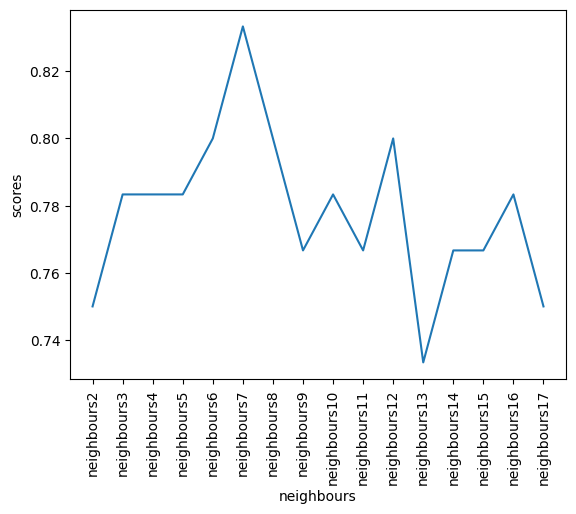

In [53]:
scoresdf= pd.DataFrame.from_dict({"neighbours":neighbours,"scores":scores})
scoresdf
plt.xticks(rotation=90)
sns.lineplot(data=scoresdf,x='neighbours',y='scores',markers=True,dashes=False)
plt.show()

**Part 1.5 b - Clearly showcase improvement in performance achieved**:
As seen above the Scores improved till neighbours number set to 7 , after that score descreased.
Score for number of neighbours 7:0.833



In [46]:
#From the above graph, we can see that score is at maximum when the number of neighbours is 7.

**PartB:**
**DOMAIN**: Banking, Marketing
**CONTEXT**: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

**PROJECT OBJECTIVE**: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

In [54]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from scipy.stats import iqr
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [55]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
cd "/content/gdrive/MyDrive/AIML/projects/SupervisedLearning"

/content/gdrive/MyDrive/AIML/projects/SupervisedLearning


In [57]:
ls

 Data1.csv   Normal.csv                 'Supervised Learning - Milestones.pdf'   Type_S.csv
 Data2.csv  'SL_Problem Statement.pdf'   Type_H.csv


**Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables**

In [58]:
data1= pd.read_csv('Data1.csv')
data2= pd.read_csv('Data2.csv')
txt =" data1 and data2 samples are:"
print(data1.head())
print(data2.head())

   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2  
   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0       

**Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes.**

In [59]:
txt ="Shape of data1 is {shape1},Shape of data2 is {shape2}"
print(txt.format(shape1=data1.shape,shape2=data2.shape))
print(data1.info(),data2.info())


Shape of data1 is (5000, 8),Shape of data2 is (5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000

**Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame**

In [60]:
data=data1.merge(data2,how='inner',on='ID')
data.head()
#data2.iloc[0:5,:]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


Part 2.1 d - Change Datatype of below features to Object:
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.] **bold text**

In [61]:
print(data.apply(lambda col: col.unique()))
data['HiddenScore']=data['HiddenScore'].astype('object')
data['Level']=data['Level'].astype('object')
data['Security']=data['Security'].astype('object')
data['FixedDepositAccount']=data['FixedDepositAccount'].astype('object')
data['InternetBanking']=data['InternetBanking'].astype('object')
data['CreditCard']=data['CreditCard'].astype('object')
data['InternetBanking']=data['InternetBanking'].astype('object')

data.info()

ID                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Age                    [25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 5...
CustomerSince          [1, 19, 15, 9, 8, 13, 27, 24, 10, 39, 5, 23, 3...
HighestSpend           [49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105...
ZipCode                [91107, 90089, 94720, 94112, 91330, 92121, 917...
HiddenScore                                                 [4, 3, 1, 2]
MonthlyAverageSpend    [1.6, 1.5, 1.0, 2.7, 0.4, 0.3, 0.6, 8.9, 2.4, ...
Level                                                          [1, 2, 3]
Mortgage               [0, 155, 104, 134, 111, 260, 163, 159, 97, 122...
Security                                                          [1, 0]
FixedDepositAccount                                               [0, 1]
InternetBanking                                                   [0, 1]
CreditCard                                                        [0, 1]
LoanOnCard                                         

**Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights**
**Insight: Imbalanced distribution: The no of people who have taken LoanOnCard is very low(approx 10%) where who have not taken is very high(approx 90%)**

In [62]:
# Making a list of all categorical variables
cat_col = [
    "HiddenScore",
    #"LoanOnCard",
    "CreditCard",
    "InternetBanking",
    "FixedDepositAccount",
    "Security",
    "Level",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

HiddenScore
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
----------------------------------------
CreditCard
0    3530
1    1470
Name: count, dtype: int64
----------------------------------------
InternetBanking
1    2984
0    2016
Name: count, dtype: int64
----------------------------------------
FixedDepositAccount
0    4698
1     302
Name: count, dtype: int64
----------------------------------------
Security
0    4478
1     522
Name: count, dtype: int64
----------------------------------------
Level
1    2096
3    1501
2    1403
Name: count, dtype: int64
----------------------------------------


<Axes: xlabel='LoanOnCard', ylabel='Count'>

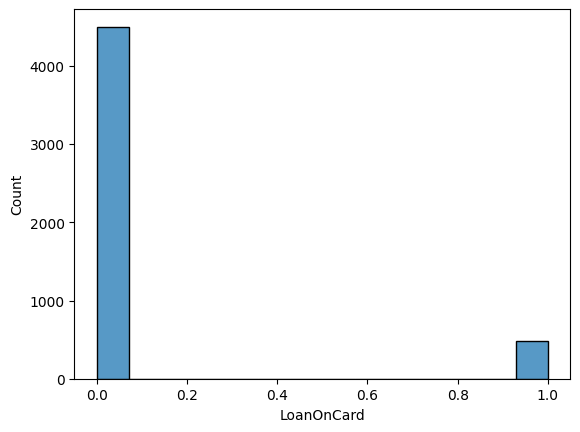

In [63]:
sns.histplot(data=data['LoanOnCard'])
#sns.countplot(data=data,x=data['LoanOnCard'])


**Part 2.2 b - Check the percentage of missing values and impute if required**
**Answer:Percentage of missing values=0.4%**
**As Missing values % is very less ,dropping the na values**

In [64]:
from sklearn.impute import SimpleImputer
#data[data['LoanOnCard'].isna()==True]
#missingcnt=data[data['LoanOnCard'].isna()==True].count()/data['LoanOnCard'].count()
#missingcnt
#print("percentage of missing values=",missingcnt*100)
n_true = len(data.loc[data['LoanOnCard'] == True])
n_false = len(data.loc[data['LoanOnCard'] == False])
n_na= len(data.loc[data['LoanOnCard'].isna() == True])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false+n_na)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false+n_na)) * 100))
print("Number of missing/na cases: {0} ({1:2.2f}%)".format(n_na, (n_na / (n_true + n_false+n_na)) * 100))
data.dropna(axis=0,inplace=True)
len(data)


Number of true cases: 480 (9.60%)
Number of false cases: 4500 (90.00%)
Number of missing/na cases: 20 (0.40%)


4980

**Part 2.2 c - Check for unexpected values in each categorical variable and impute with best suitable value.**
**There are no unexpected values in categorical columns **

In [65]:
cat_col = [
    "HiddenScore",
    #"LoanOnCard",
    "CreditCard",
    "InternetBanking",
    "FixedDepositAccount",
    "Security",
    "Level",
]
print(data.apply(lambda col: col.unique()))
for col in cat_col:
  if data[col].any()=='Unknown' or data[col].any()=='unknown' or data[col].any()=='?':
    print(data[data[col]=='Unknown'])
data['LoanOnCard']=data['LoanOnCard'].astype('int')

ID                     [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2...
Age                    [34, 65, 29, 48, 59, 67, 60, 38, 42, 46, 55, 5...
CustomerSince          [9, 39, 5, 23, 32, 41, 30, 14, 18, 21, 28, 31,...
HighestSpend           [180, 105, 45, 114, 40, 112, 22, 130, 81, 193,...
ZipCode                [93023, 94710, 90277, 93106, 94920, 91741, 950...
HiddenScore                                                 [1, 4, 3, 2]
MonthlyAverageSpend    [8.9, 2.4, 0.1, 3.8, 2.5, 2.0, 1.5, 4.7, 8.1, ...
Level                                                          [3, 2, 1]
Mortgage               [0, 134, 111, 260, 163, 159, 97, 122, 193, 198...
Security                                                          [0, 1]
FixedDepositAccount                                               [0, 1]
InternetBanking                                                   [0, 1]
CreditCard                                                        [0, 1]
LoanOnCard                                         

**Part 2.3 a- Split data into X and Y**

In [66]:
X=data.drop('LoanOnCard',axis=1)
y=data['LoanOnCard']

**Part 2.3 b - Split data into train and test. Keep 25% data reserved for testing**

In [67]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=1)

In [68]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3735, 16)
Shape of test set :  (1245, 16)
Percentage of classes in training set:
LoanOnCard
0    0.905489
1    0.094511
Name: proportion, dtype: float64
Percentage of classes in test set:
LoanOnCard
0    0.897992
1    0.102008
Name: proportion, dtype: float64


**Part 2.3 c - Train a Supervised Learning Classification base model - Logistic Regression**

In [69]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

#predict on test
y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000008  0.005529  0.002985  0.036049 -0.000068  0.008439  0.000655   

         7         8        9        10        11        12        13  \
0 -0.00488  0.004295  0.00421  0.006303  0.006493  0.000971  0.005241   

        14        15  intercept  
0 -0.00008  0.000473  -0.000059  


**Part 2.3 d - Print evaluation metrics for the model and clearly share insights.**

In [70]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [71]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9052208835341365


**Confusion Matrix**

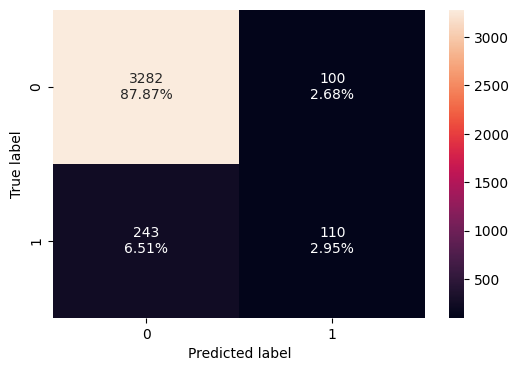

In [72]:
confusion_matrix_sklearn(model, X_train, y_train)

**Part 2.3 e - Balance the data using the right balancing technique.**
**Used balancing technique: Resampling**

In [73]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = data[(data['LoanOnCard']==0)]
df_minority = data[(data['LoanOnCard']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 4500, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
X_up=df_upsampled.drop('LoanOnCard',axis=1)
y_up=df_upsampled['LoanOnCard']
# creating dummy variables
X_up = pd.get_dummies(X_up, drop_first=True)
X_up_train,X_up_test,y_up_train,y_up_test=model_selection.train_test_split(X_up,y_up,test_size=0.25,random_state=1)

print("Shape of Training set : ", X_up_train.shape)
print("Shape of test set : ", X_up_test.shape)
print("Percentage of classes in training set:")
print(y_up_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_up_test.value_counts(normalize=True))

Shape of Training set :  (6750, 16)
Shape of test set :  (2250, 16)
Percentage of classes in training set:
LoanOnCard
1    0.501481
0    0.498519
Name: proportion, dtype: float64
Percentage of classes in test set:
LoanOnCard
0    0.504444
1    0.495556
Name: proportion, dtype: float64


**Part 2.3 f- Again train the same previous model on balanced data**

In [74]:

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_up_train, y_up_train)

#predict on test
y_predict = model.predict(X_up_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

        0         1         2         3         4         5         6  \
0 -0.0001 -0.079114  0.075383  0.053451 -0.000066  0.243849  0.000275   

          7         8         9        10       11        12        13  \
0  0.070468  1.368919  1.407374  2.542243  2.65314 -0.782136  3.048037   

         14        15  intercept  
0 -0.697758 -0.603547  -0.056923  


In [75]:
model_score = model.score(X_up_test, y_up_test)
print(model_score)

0.9004444444444445


Performance metrics function for Logistic Regression

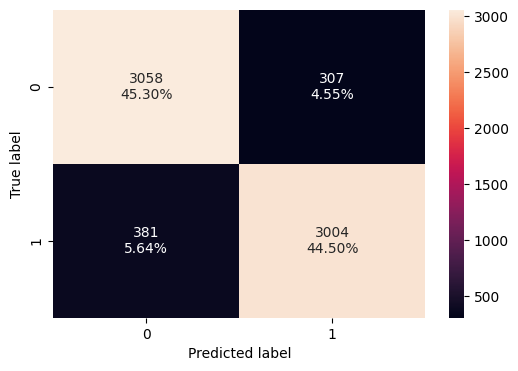

In [76]:
confusion_matrix_sklearn(model, X_up_train, y_up_train)

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

Performance metrics function for kNN

In [78]:
 def model_performance_classification_sklearn_kNN(model, pred, target):
  acc = accuracy_score(target, pred)  # to compute Accuracy
  recall = recall_score(target, pred)  # to compute Recall
  precision = precision_score(target, pred)  # to compute Precision
  f1 = f1_score(target, pred)  # to compute F1-score
  # creating a dataframe of metrics
  df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
  return df_perf

**Part 2.3 g- Print evaluation metrics and clearly share differences observed**
**With balanced data : A drastic deference in F1 score can be observed**
**F1Score without balanced data:0.65**
**F1Score with balanced data:0.89**

In [79]:
print("Test performance with out balanced data:")
log_reg_model_test_perf = model_performance_classification_sklearn(
    model, X_test, y_test
)
log_reg_model_test_perf

Test performance with out balanced data:


,Accuracy,Recall,Precision,F1
0,0.905221,0.897638,0.520548,0.65896


In [80]:
print("Test performance with balanced data:")
# checking model performance for this model
log_reg_model_test_perf = model_performance_classification_sklearn(
    model, X_up_test, y_up_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance with balanced data:
Test performance:


,Accuracy,Recall,Precision,F1
0,0.900444,0.895964,0.902439,0.89919


**Part 2.4 a- Train a base model each for KNN**

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.neighbors import RadiusNeighborsClassifier


In [82]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=1)

In [83]:
def kNN(n_neighbors:int,weights:str,X_train,y_train,X_test,y_test):
   NNH = KNeighborsClassifier(n_neighbors , weights = 'distance' )
   # Call Nearest Neighbour algorithm
   NNH.fit(X_train, y_train)
   predicted_labels = NNH.predict(X_test)
   score=NNH.score(X_test, y_test)
   return predicted_labels,score

In [84]:
predlabels,score=kNN(5,'distance',X_train,y_train,X_test,y_test)
score

0.8923694779116466

In [85]:
log_reg_model_test_perf = model_performance_classification_sklearn_kNN(
    model, predlabels, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.892369,0.047244,0.315789,0.082192


**Part 2.4 a- Train a base model for SVM**

In [86]:
from sklearn import svm

In [87]:
clf = svm.SVC(gamma=0.025, C=3)

In [88]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [89]:
y_pred = clf.predict(X_test)

In [90]:
def getAccuracy(testSet, predictions):
  testSet=testSet.to_numpy()
  correct = 0
  for x in range(len(testSet)):
    if testSet[x]== predictions[x]:
      correct += 1
  return (correct/float(len(testSet))) * 100.0

In [91]:
getAccuracy(y_test,y_pred)

89.79919678714859

**Part 2.4 b - Tune parameters for kNN wherever required and finalize a mode**:
**As per the lineplot below best score is achieved at n_neighbours=11**

In [97]:
scores=[]
neighbours=[]
for i in range(2,18):
  scores.append(kNN(i,'distance',X_train,y_train,X_test,y_test)[1])
  neighbours.append("neighbours"+str(i))

print(scores)
print(neighbours)

[0.8642570281124498, 0.8859437751004016, 0.8891566265060241, 0.8923694779116466, 0.8931726907630522, 0.8939759036144578, 0.8939759036144578, 0.8955823293172691, 0.8963855421686747, 0.8987951807228916, 0.8979919678714859, 0.8979919678714859, 0.8979919678714859, 0.8979919678714859, 0.8979919678714859, 0.8979919678714859]
['neighbours2', 'neighbours3', 'neighbours4', 'neighbours5', 'neighbours6', 'neighbours7', 'neighbours8', 'neighbours9', 'neighbours10', 'neighbours11', 'neighbours12', 'neighbours13', 'neighbours14', 'neighbours15', 'neighbours16', 'neighbours17']


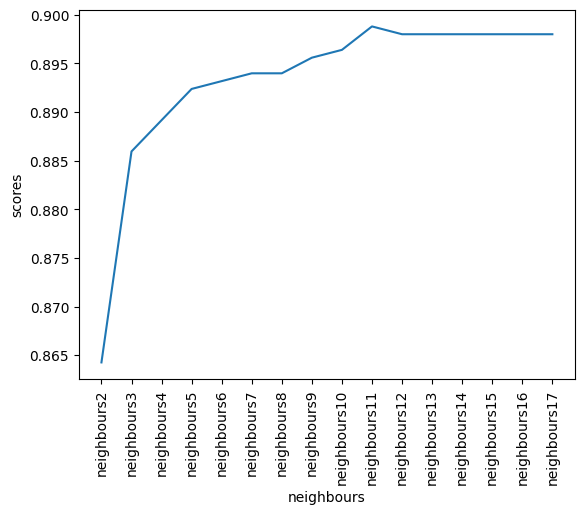

In [98]:
scoresdf= pd.DataFrame.from_dict({"neighbours":neighbours,"scores":scores})
scoresdf
plt.xticks(rotation=90)
sns.lineplot(data=scoresdf,x='neighbours',y='scores',markers=True,dashes=False)
plt.show()

**Part 2.4 b - Tune parameters for SVM wherever required and finalize a mode**:

In [99]:
from sklearn import metrics
from sklearn import svm
# creating dummy variables
X=data.drop('LoanOnCard',axis=1)
y=data['LoanOnCard']
X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=1)

In [100]:
clist=[3,2,1,4,3,2,1,4,3]
gammalist = [0.01,0.025,0.03,0.04,0.025,0.06,0.07,0.08,0.09]


In [101]:
def train_SVM(gammaval:float,cval:int):
  X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=1)
  print(gammaval,cval)
  clf = svm.SVC(gamma=gammaval, C=cval)
  clf.fit(X_train , y_train)
  y_pred = clf.predict(X_test)
  return y_test,y_pred,getAccuracy(y_test,y_pred)

In [102]:
scors=[]
for i in range(9):
  #print(i)
  #print(clist[i],gammalist[i])
  scors.append(train_SVM(clist[i],gammalist[i])[2])
  i+=1
scors


3 0.01
2 0.025
1 0.03
4 0.04
3 0.025
2 0.06
1 0.07
4 0.08
3 0.09


[89.79919678714859,
 89.79919678714859,
 89.79919678714859,
 89.79919678714859,
 89.79919678714859,
 89.79919678714859,
 89.79919678714859,
 89.79919678714859,
 89.79919678714859]

**Part 2.4 c- Print evaluation metrics for final model**

In [103]:
from sklearn import metrics
# creating dummy variables
X=data.drop('LoanOnCard',axis=1)
y=data['LoanOnCard']
X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=1)
pred,score=kNN(6,'distance',X_train,y_train,X_test,y_test)
score


0.8931726907630522

**Part 2.4 d- Share improvement achieved from base model to final model**

**Improvement in F1Score with neighbours=6 as shown below.**
**Improvement in Accuracy when neighbours =11**
**when neighbours=5,F1 score: 0.082192**
**neighbours=6,score: 0.082759 **


In [104]:
log_reg_model_test_perf = model_performance_classification_sklearn_kNN(
    model, pred, y_test
)
print("Test performance for final model using kNN with neighbours 6:")
log_reg_model_test_perf

Test performance for final model using kNN with neighbours 6:


,Accuracy,Recall,Precision,F1
0,0.893173,0.047244,0.333333,0.082759


**Part 2.4 c- Print evaluation metrics for final model using SVM**

In [105]:
from sklearn import metrics
import seaborn as sns
# creating dummy variables
X=data.drop('LoanOnCard',axis=1)
y=data['LoanOnCard']
X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=1)
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
getAccuracy(y_test,y_pred)

89.79919678714859